# Convolutional Neural Network
1. Conv2D: 32 filters, (3, 3) kernel, ReLU activation, input shape (28, 28, 1)
2. MaxPooling2D: (2, 2) pool size
3. Conv2D: 64 filters, (3, 3) kernel, ReLU activation
4. MaxPooling2D: (2, 2) pool size
5. Conv2D: 128 filters, (3, 3) kernel, ReLU activation
6. MaxPooling2D: (2, 2) pool size
7. Flatten
8. Dense: 10 units, softmax activation


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from keras.datasets import mnist

# Data Preparation

In [14]:
from load_emnist_mnist import load_emnist_mnist
from load_emnist_mnist import load_emnist_letters

X_train_mnist, X_test_mnist, y_train_mnist, y_test_mnist = load_emnist_mnist("emnist_mnist")
X_train_letters, X_test_letters, y_train_letters, y_test_letters = load_emnist_letters("emnist_letters")
y_train_letters = y_train_letters + 10
y_test_letters = y_test_letters + 10

In [ ]:
X_train = np.concatenate((X_train_mnist, X_train_letters), axis=0)
y_train = np.concatenate((y_train_mnist, y_train_letters), axis=0)
X_test = np.concatenate((X_test_mnist, X_test_letters), axis=0)
y_test = np.concatenate((y_test_mnist, y_test_letters), axis=0)

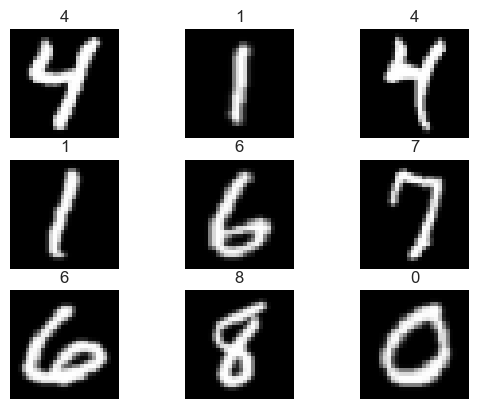

ValueError: num must be an integer with 1 <= num <= 12, not 0

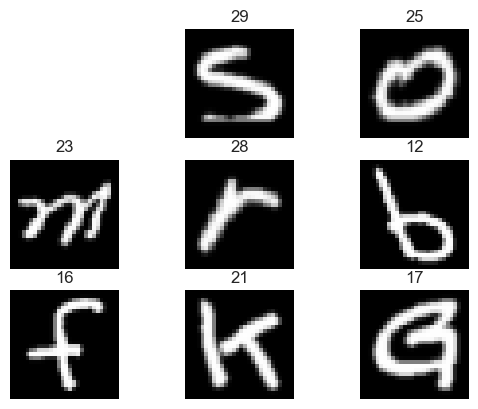

In [20]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.title(y_train[i])
plt.show()

for i in range(len(X_train) - 1, len(X_train) - 11, -1):
    plt.subplot(330 + 1 + len(X_train) - i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.title(y_train[i])
plt.show()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [21]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Model Building

In [22]:
from keras_tuner import RandomSearch
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [26]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(37, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 37)             │         4,773 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97,445 (380.64 KB)

 Trainable params: 97,445 (380.64 KB)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [28]:
history = model.fit(X_train, y_train, epochs=15, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/15
1444/1444 ━━━━━━━━━━━━━━━━━━━━ 37s 25ms/step - accuracy: 0.6040 - loss: 1.8750 - val_accuracy: 0.8078 - val_loss: 0.5483
Epoch 2/15
1444/1444 ━━━━━━━━━━━━━━━━━━━━ 36s 25ms/step - accuracy: 0.8292 - loss: 0.4947 - val_accuracy: 0.8423 - val_loss: 0.4489
Epoch 3/15
1444/1444 ━━━━━━━━━━━━━━━━━━━━ 36s 25ms/step - accuracy: 0.8542 - loss: 0.4117 - val_accuracy: 0.8478 - val_loss: 0.4361
Epoch 4/15
1444/1444 ━━━━━━━━━━━━━━━━━━━━ 35s 25ms/step - accuracy: 0.8624 - loss: 0.3803 - val_accuracy: 0.8444 - val_loss: 0.4382
Epoch 5/15
1444/1444 ━━━━━━━━━━━━━━━━━━━━ 37s 25ms/step - accuracy: 0.8720 - loss: 0.3537 - val_accuracy: 0.8581 - val_loss: 0.4124
Epoch 6/15
1444/1444 ━━━━━━━━━━━━━━━━━━━━ 36s 25ms/step - accuracy: 0.8752 - loss: 0.3384 - val_accuracy: 0.8570 - val_loss: 0.4125
Epoch 7/15
1444/1444 ━━━━━━━━━━━━━━━━━━━━ 36s 25ms/step - accuracy: 0.8796 - loss: 0.3247 - val_accuracy: 0.8625 - val_loss: 0.4019
Epoch 8/15
1444/1444 ━━━━━━━━━━━━━━━━━━━━ 36s 25ms/step - accuracy: 0.8847 -

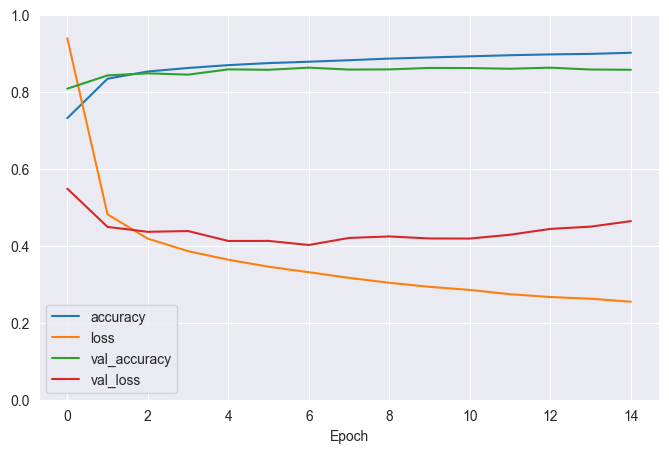

In [29]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.xlabel('Epoch')
plt.ylim([0, 1])
plt.show()

In [30]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

963/963 - 4s - 4ms/step - accuracy: 0.8570 - loss: 0.4639


In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

In [45]:
def print_characters(X, y_pred, y_test, n_rows=4, n_cols=10):
    plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(X[index].reshape(28,28), cmap="binary", interpolation="nearest")
            plt.axis('off')
            if y_pred[index] >= 10:
                plt.title(chr(y_pred[index] - 11 + 97), color='black' if y_pred[index] == y_test[index] else 'red')
            else:
                plt.title(y_pred[index], color='black' if y_pred[index] == y_test[index] else 'red')
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    plt.show()

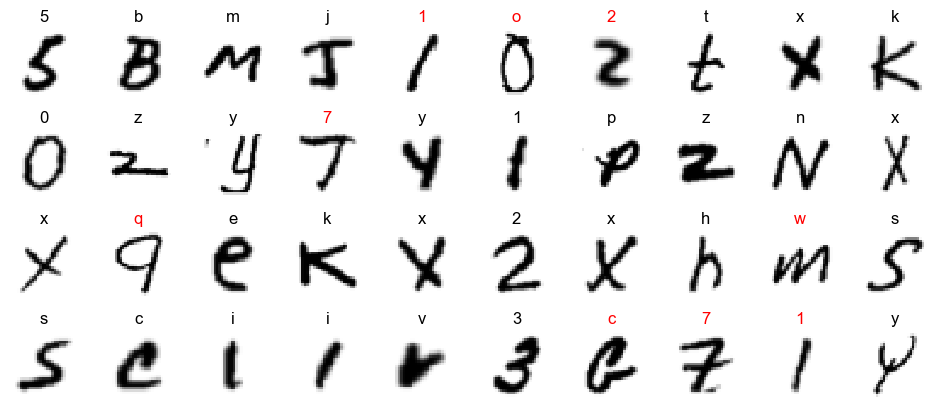

In [58]:
indexes = np.random.randint(0, X_test.shape[0], 4*10)
print_characters(X_test[indexes], y_pred[indexes], y_test[indexes])

from sklearn.metrics import accuracy_score

In [59]:
accuracy_score(y_test, y_pred)

0.857012987012987

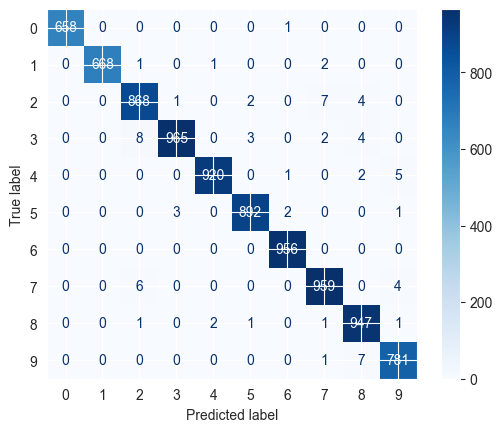

In [48]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred, labels=np.arange(10))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=np.arange(10), )

cm_display.plot(cmap='Blues', values_format='d')
plt.show()

In [60]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67      1000
           1       0.59      0.67      0.63      1000
           2       0.90      0.87      0.88      1000
           3       0.99      0.96      0.98      1000
           4       0.94      0.92      0.93      1000
           5       0.95      0.89      0.92      1000
           6       0.93      0.96      0.94      1000
           7       0.95      0.96      0.95      1000
           8       0.92      0.95      0.93      1000
           9       0.80      0.78      0.79      1000
          11       0.88      0.87      0.88       800
          12       0.83      0.83      0.83       800
          13       0.96      0.94      0.95       800
          14       0.91      0.90      0.91       800
          15       0.90      0.95      0.92       800
          16       0.94      0.88      0.91       800
          17       0.66      0.74      0.70       800
          18       0.83    